<a href="https://colab.research.google.com/github/5harad/API201-students/blob/main/lectures/lecture-18-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 17: Statistical significance



In [1]:
library(tidyverse)

theme_set(theme_bw())

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
set.seed(1)

In [3]:
n1 <- 3000
p1_hat <- 201 / 3000

n2 <- 3000
p2_hat <- 141 / 3000

p1_hat - p2_hat

[1] 0.02

In [4]:
s <- sqrt(p1_hat*(1-p1_hat)/n1 + p2_hat*(1-p2_hat)/n2)
s

[1] 0.00598058

In [5]:
estimates <- rnorm(1e6, mean = 0, sd = s)

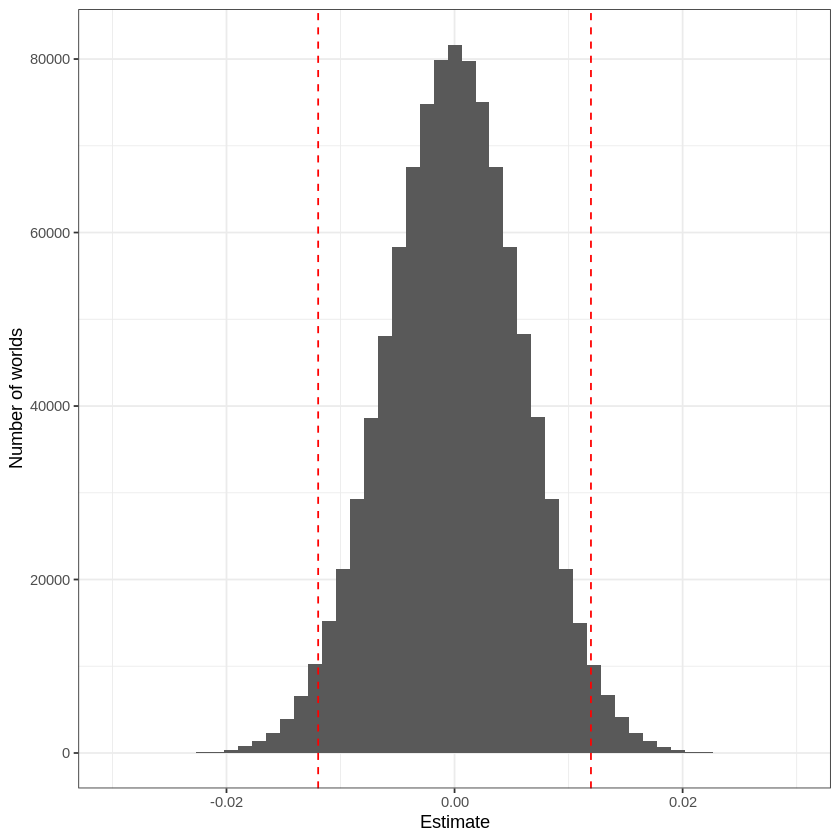

In [6]:
ggplot(tibble(Estimate = estimates), aes(x = Estimate)) +
  geom_histogram(bins=50) +
  scale_y_continuous('Number of worlds') +
  scale_x_continuous(limits=c(-.03, .03)) +
  geom_vline(xintercept = -2*s, color='red', linetype='dashed') +
  geom_vline(xintercept = 2*s, color='red', linetype='dashed')
ggsave('null-diff-in-prop.png', width=4, height=4)

In [7]:
z <- ( (p1_hat - p2_hat) - 0 ) / s
z

[1] 3.344157

In [8]:
p_value <- 2*pnorm(-abs(z))
p_value

[1] 0.0008253289